In [11]:
import pandas 
dd = pandas.read_csv(r'C:\Users\Access\Downloads\eurusd_.csv')


In [12]:
dd

,Gmt time,Open,High,Low,Close,Volume,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30
0,2024-04-01 00:01:39.471,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079285,1.079343,1.079391,1.079412,1.079429,91.912193,0.000006,0.000008
1,2024-04-01 00:01:40.638,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079288,1.079347,1.079396,1.079416,1.079432,91.912193,0.000005,0.000007
2,2024-04-01 00:01:40.794,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079291,1.079350,1.079400,1.079419,1.079434,91.912193,0.000005,0.000007
3,2024-04-01 00:01:41.199,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079294,1.079354,1.079403,1.079422,1.079435,91.912193,0.000004,0.000007
4,2024-04-01 00:01:42.768,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079297,1.079357,1.079407,1.079425,1.079437,91.912193,0.000004,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059327,2024-09-27 20:59:58.689,1.11628,1.11628,1.11628,1.11628,1.800000e+06,1.116314,1.116306,1.116292,1.116284,1.116277,46.989565,0.000020,0.000022
9059328,2024-09-27 20:59:58.740,1.11617,1.11617,1.11617,1.11617,4.500000e+06,1.116312,1.116301,1.116281,1.116268,1.116250,28.959480,0.000029,0.000025
9059329,2024-09-27 20:59:58.941,1.11614,1.11614,1.11614,1.11614,9.000000e+05,1.116308,1.116295,1.116268,1.116250,1.116223,25.942987,0.000029,0.000025
9059330,2024-09-27 20:59:59.094,1.11619,1.11619,1.11619,1.11619,1.800000e+06,1.116306,1.116291,1.116261,1.116241,1.116215,37.918175,0.000031,0.000026


In [ ]:
import pandas as pd


# تحويل البيانات إلى DataFrame
df = dd

# إضافة الأعمدة الجديدة
df['Signal'] = 0
df['Take Profit'] = 0.0
df['Stop Loss'] = 0.0
df['Result'] = ''
df['Trade Duration'] = pd.NaT

# حساب التقاطعات
for i in range(1, len(df)):
    if df['EMA_13'][i] > df['EMA_21'][i] and df['EMA_13'][i-1] <= df['EMA_21'][i-1]:
        # إشارة شراء
        df.at[i, 'Signal'] = 1
        df.at[i, 'Take Profit'] = df.at[i, 'Open'] + 0.0004
        df.at[i, 'Stop Loss'] = df.at[i, 'Open'] - 0.0004
    elif df['EMA_13'][i] < df['EMA_21'][i] and df['EMA_13'][i-1] >= df['EMA_21'][i-1]:
        # إشارة بيع
        df.at[i, 'Signal'] = -1
        df.at[i, 'Take Profit'] = df.at[i, 'Open'] - 0.0004
        df.at[i, 'Stop Loss'] = df.at[i, 'Open'] + 0.0004

# تحديد إذا كانت الصفقة رابحة أم خاسرة وحساب مدة الصفقة
for i in range(1, len(df)):
    if df.at[i, 'Signal'] != 0:
        take_profit = df.at[i, 'Take Profit']
        stop_loss = df.at[i, 'Stop Loss']
        
        # ابحث في الصفوف التالية لمعرفة إذا تم الوصول إلى الهدف أو وقف الخسارة
        for j in range(i+1, len(df)):
            if df.at[i, 'Signal'] == 1:
                # حالة الشراء: نبحث عن الوصول إلى السعر الهدف أو وقف الخسارة
                if df.at[j, 'High'] >= take_profit:
                    df.at[i, 'Result'] = 'Win'
                    break
                elif df.at[j, 'Low'] <= stop_loss:
                    df.at[i, 'Result'] = 'Loss'
                    break
            elif df.at[i, 'Signal'] == -1:
                # حالة البيع: نبحث عن الوصول إلى السعر الهدف أو وقف الخسارة
                if df.at[j, 'Low'] <= take_profit:
                    df.at[i, 'Result'] = 'Win'
                    break
                elif df.at[j, 'High'] >= stop_loss:
                    df.at[i, 'Result'] = 'Loss'
                    break

# عرض النتائج النهائية
df


In [15]:
import pandas as pd
import numpy as np

# افترض أن df هو DataFrame الخاص بك
df['Signal'] = np.where((df['EMA_13'] > df['EMA_21']) & (df['EMA_13'].shift(1) <= df['EMA_21'].shift(1)), 1, 0)
df['Signal'] = np.where((df['EMA_13'] < df['EMA_21']) & (df['EMA_13'].shift(1) >= df['EMA_21'].shift(1)), -1, df['Signal'])

df['Take Profit'] = np.where(df['Signal'] == 1, df['Open'] + 0.0004, np.where(df['Signal'] == -1, df['Open'] - 0.0004, 0))
df['Stop Loss'] = np.where(df['Signal'] == 1, df['Open'] - 0.0004, np.where(df['Signal'] == -1, df['Open'] + 0.0004, 0))

df['Result'] = ''
for i in range(len(df)):
    if df.at[i, 'Signal'] != 0:
        take_profit = df.at[i, 'Take Profit']
        stop_loss = df.at[i, 'Stop Loss']
        if df.at[i, 'Signal'] == 1:
            win_condition = (df['High'][i+1:] >= take_profit).idxmax()
            loss_condition = (df['Low'][i+1:] <= stop_loss).idxmax()
        else:
            win_condition = (df['Low'][i+1:] <= take_profit).idxmax()
            loss_condition = (df['High'][i+1:] >= stop_loss).idxmax()
        
        if win_condition < loss_condition:
            df.at[i, 'Result'] = 'Win'
        elif loss_condition < win_condition:
            df.at[i, 'Result'] = 'Loss'

# عرض النتائج النهائية
df


,Gmt time,Open,High,Low,Close,Volume,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result,Trade Duration
0,2024-04-01 00:01:39.471,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079285,1.079343,1.079391,1.079412,1.079429,91.912193,0.000006,0.000008,0,0.0,0.0,,NaT
1,2024-04-01 00:01:40.638,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079288,1.079347,1.079396,1.079416,1.079432,91.912193,0.000005,0.000007,0,0.0,0.0,,NaT
2,2024-04-01 00:01:40.794,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079291,1.079350,1.079400,1.079419,1.079434,91.912193,0.000005,0.000007,0,0.0,0.0,,NaT
3,2024-04-01 00:01:41.199,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079294,1.079354,1.079403,1.079422,1.079435,91.912193,0.000004,0.000007,0,0.0,0.0,,NaT
4,2024-04-01 00:01:42.768,1.07944,1.07944,1.07944,1.07944,9.000000e+05,1.079297,1.079357,1.079407,1.079425,1.079437,91.912193,0.000004,0.000007,0,0.0,0.0,,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059327,2024-09-27 20:59:58.689,1.11628,1.11628,1.11628,1.11628,1.800000e+06,1.116314,1.116306,1.116292,1.116284,1.116277,46.989565,0.000020,0.000022,0,0.0,0.0,,NaT
9059328,2024-09-27 20:59:58.740,1.11617,1.11617,1.11617,1.11617,4.500000e+06,1.116312,1.116301,1.116281,1.116268,1.116250,28.959480,0.000029,0.000025,0,0.0,0.0,,NaT
9059329,2024-09-27 20:59:58.941,1.11614,1.11614,1.11614,1.11614,9.000000e+05,1.116308,1.116295,1.116268,1.116250,1.116223,25.942987,0.000029,0.000025,0,0.0,0.0,,NaT
9059330,2024-09-27 20:59:59.094,1.11619,1.11619,1.11619,1.11619,1.800000e+06,1.116306,1.116291,1.116261,1.116241,1.116215,37.918175,0.000031,0.000026,0,0.0,0.0,,NaT


In [18]:
df[180:240]

,Gmt time,Open,High,Low,Close,Volume,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result,Trade Duration
180,2024-04-01 00:05:44.961,1.07953,1.07953,1.07953,1.07953,9.000000e+05,1.079482,1.079513,1.079526,1.079525,1.079521,52.271003,0.000010,0.000009,0,0.00000,0.00000,,NaT
181,2024-04-01 00:05:45.621,1.07952,1.07952,1.07952,1.07952,1.350000e+06,1.079482,1.079513,1.079525,1.079524,1.079521,46.948229,0.000010,0.000009,0,0.00000,0.00000,,NaT
182,2024-04-01 00:05:45.822,1.07953,1.07953,1.07953,1.07953,9.000000e+05,1.079483,1.079514,1.079526,1.079525,1.079523,52.340639,0.000010,0.000009,0,0.00000,0.00000,,NaT
183,2024-04-01 00:05:45.927,1.07952,1.07952,1.07952,1.07952,1.350000e+06,1.079484,1.079514,1.079525,1.079524,1.079522,47.029245,0.000010,0.000009,0,0.00000,0.00000,,NaT
184,2024-04-01 00:05:46.131,1.07953,1.07953,1.07953,1.07953,9.000000e+05,1.079485,1.079515,1.079526,1.079525,1.079524,52.396651,0.000010,0.000009,0,0.00000,0.00000,,NaT
185,2024-04-01 00:05:46.335,1.07952,1.07952,1.07952,1.07952,1.350000e+06,1.079486,1.079515,1.079525,1.079524,1.079523,47.094458,0.000010,0.000009,0,0.00000,0.00000,,NaT
186,2024-04-01 00:05:46.890,1.07953,1.07953,1.07953,1.07953,9.000000e+05,1.079486,1.079516,1.079526,1.079525,1.079525,52.441766,0.000010,0.000009,0,0.00000,0.00000,,NaT
187,2024-04-01 00:05:47.349,1.07952,1.07952,1.07952,1.07952,1.350000e+06,1.079487,1.079516,1.079525,1.079524,1.079524,47.147013,0.000010,0.000009,0,0.00000,0.00000,,NaT
188,2024-04-01 00:05:48.462,1.07953,1.07953,1.07953,1.07953,9.000000e+05,1.079488,1.079516,1.079526,1.079525,1.079525,52.478143,0.000010,0.000009,0,0.00000,0.00000,,NaT
189,2024-04-01 00:05:48.969,1.07952,1.07952,1.07952,1.07952,1.350000e+06,1.079489,1.079517,1.079525,1.079524,1.079524,47.189408,0.000010,0.000009,0,0.00000,0.00000,,NaT


In [21]:
df__ = df[(df['Signal'] != 0)]


In [27]:
import pandas as pd

In [25]:
df__[:]

,Gmt time,Open,High,Low,Close,Volume,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result,Trade Duration
16,2024-04-01 00:01:50.784,1.07938,1.07938,1.07938,1.07938,9.000000e+05,1.079319,1.079372,1.079399,1.079398,1.079391,29.886993,0.000005,0.000007,-1,1.07898,1.07978,Loss,NaT
62,2024-04-01 00:02:42.405,1.07934,1.07934,1.07934,1.07934,1.800000e+06,1.079322,1.079330,1.079322,1.079322,1.079327,68.667825,0.000005,0.000005,1,1.07974,1.07894,Win,NaT
125,2024-04-01 00:04:00.852,1.07945,1.07945,1.07945,1.07945,9.000000e+05,1.079417,1.079459,1.079487,1.079486,1.079477,30.202891,0.000010,0.000009,-1,1.07905,1.07985,Loss,NaT
132,2024-04-01 00:04:30.708,1.07949,1.07949,1.07949,1.07949,9.000000e+05,1.079425,1.079464,1.079485,1.079485,1.079485,52.992617,0.000009,0.000009,1,1.07989,1.07909,Loss,NaT
133,2024-04-01 00:04:30.762,1.07947,1.07947,1.07947,1.07947,9.000000e+05,1.079426,1.079464,1.079483,1.079483,1.079481,42.814611,0.000010,0.000010,-1,1.07907,1.07987,Loss,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9059308,2024-09-27 20:59:55.095,1.11631,1.11631,1.11631,1.11631,9.000000e+05,1.116324,1.116322,1.116322,1.116321,1.116320,48.059856,0.000033,0.000025,-1,1.11591,1.11671,,NaT
9059311,2024-09-27 20:59:55.350,1.11634,1.11634,1.11634,1.11634,9.000000e+05,1.116324,1.116323,1.116323,1.116323,1.116325,53.106030,0.000030,0.000025,1,1.11674,1.11594,,NaT
9059312,2024-09-27 20:59:55.404,1.11631,1.11631,1.11631,1.11631,9.000000e+05,1.116324,1.116322,1.116322,1.116321,1.116321,47.860002,0.000030,0.000025,-1,1.11591,1.11671,,NaT
9059314,2024-09-27 20:59:55.704,1.11634,1.11634,1.11634,1.11634,9.000000e+05,1.116324,1.116323,1.116323,1.116324,1.116326,53.358578,0.000027,0.000024,1,1.11674,1.11594,,NaT


In [51]:
df_f = df__[df__['Result'] != ''] 

In [53]:
df_ff = df_f[df_f['Result'] != 'Loss'] 

In [54]:
df_ff

,Gmt time,Open,High,Low,Close,Volume,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result,Trade Duration
62,2024-04-01 00:02:42.405,1.07934,1.07934,1.07934,1.07934,1.800000e+06,1.079322,1.079330,1.079322,1.079322,1.079327,68.667825,0.000005,0.000005,1,1.07974,1.07894,Win,NaT
178,2024-04-01 00:05:32.364,1.07951,1.07951,1.07951,1.07951,9.000000e+05,1.079480,1.079513,1.079527,1.079526,1.079521,40.033247,0.000010,0.000009,-1,1.07911,1.07991,Win,NaT
200,2024-04-01 00:06:00.579,1.07948,1.07948,1.07948,1.07948,1.147000e+07,1.079498,1.079522,1.079528,1.079526,1.079517,28.963038,0.000013,0.000010,-1,1.07908,1.07988,Win,NaT
236,2024-04-01 00:07:27.843,1.07950,1.07950,1.07950,1.07950,9.000000e+05,1.079512,1.079526,1.079529,1.079527,1.079522,36.593416,0.000012,0.000011,-1,1.07910,1.07990,Win,NaT
286,2024-04-01 00:08:58.632,1.07954,1.07954,1.07954,1.07954,9.000000e+05,1.079536,1.079554,1.079570,1.079569,1.079558,35.050758,0.000011,0.000011,-1,1.07914,1.07994,Win,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058931,2024-09-27 20:57:18.999,1.11629,1.11629,1.11629,1.11629,9.000000e+05,1.116289,1.116283,1.116278,1.116278,1.116281,55.255030,0.000013,0.000014,1,1.11669,1.11589,Win,NaT
9058979,2024-09-27 20:57:37.053,1.11633,1.11633,1.11633,1.11633,1.200000e+05,1.116291,1.116291,1.116292,1.116293,1.116296,68.679308,0.000011,0.000011,1,1.11673,1.11593,Win,NaT
9059038,2024-09-27 20:57:44.277,1.11636,1.11636,1.11636,1.11636,9.000000e+05,1.116326,1.116333,1.116332,1.116332,1.116337,63.930914,0.000011,0.000011,1,1.11676,1.11596,Win,NaT
9059073,2024-09-27 20:57:57.324,1.11589,1.11589,1.11589,1.11589,9.000000e+05,1.116219,1.116161,1.116102,1.116092,1.116073,34.388949,0.000074,0.000050,-1,1.11549,1.11629,Win,NaT


In [55]:
df_reset = df_ff.reset_index(drop=True)


In [56]:
df_reset

,Gmt time,Open,High,Low,Close,Volume,EMA_100,EMA_50,EMA_21,EMA_13,EMA_7,RSI_10,ATR_10,ATR_30,Signal,Take Profit,Stop Loss,Result,Trade Duration
0,2024-04-01 00:02:42.405,1.07934,1.07934,1.07934,1.07934,1.800000e+06,1.079322,1.079330,1.079322,1.079322,1.079327,68.667825,0.000005,0.000005,1,1.07974,1.07894,Win,NaT
1,2024-04-01 00:05:32.364,1.07951,1.07951,1.07951,1.07951,9.000000e+05,1.079480,1.079513,1.079527,1.079526,1.079521,40.033247,0.000010,0.000009,-1,1.07911,1.07991,Win,NaT
2,2024-04-01 00:06:00.579,1.07948,1.07948,1.07948,1.07948,1.147000e+07,1.079498,1.079522,1.079528,1.079526,1.079517,28.963038,0.000013,0.000010,-1,1.07908,1.07988,Win,NaT
3,2024-04-01 00:07:27.843,1.07950,1.07950,1.07950,1.07950,9.000000e+05,1.079512,1.079526,1.079529,1.079527,1.079522,36.593416,0.000012,0.000011,-1,1.07910,1.07990,Win,NaT
4,2024-04-01 00:08:58.632,1.07954,1.07954,1.07954,1.07954,9.000000e+05,1.079536,1.079554,1.079570,1.079569,1.079558,35.050758,0.000011,0.000011,-1,1.07914,1.07994,Win,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173558,2024-09-27 20:57:18.999,1.11629,1.11629,1.11629,1.11629,9.000000e+05,1.116289,1.116283,1.116278,1.116278,1.116281,55.255030,0.000013,0.000014,1,1.11669,1.11589,Win,NaT
173559,2024-09-27 20:57:37.053,1.11633,1.11633,1.11633,1.11633,1.200000e+05,1.116291,1.116291,1.116292,1.116293,1.116296,68.679308,0.000011,0.000011,1,1.11673,1.11593,Win,NaT
173560,2024-09-27 20:57:44.277,1.11636,1.11636,1.11636,1.11636,9.000000e+05,1.116326,1.116333,1.116332,1.116332,1.116337,63.930914,0.000011,0.000011,1,1.11676,1.11596,Win,NaT
173561,2024-09-27 20:57:57.324,1.11589,1.11589,1.11589,1.11589,9.000000e+05,1.116219,1.116161,1.116102,1.116092,1.116073,34.388949,0.000074,0.000050,-1,1.11549,1.11629,Win,NaT


In [57]:
df_reset.to_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4.csv", index=False)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 7.05133421996595e-05


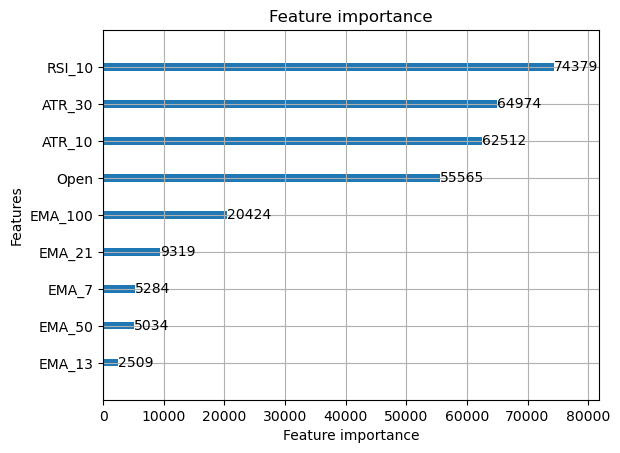

In [58]:
# استيراد المكتبات اللازمة
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# قراءة البيانات
# استبدل 'data.csv' باسم ملف البيانات الخاص بك
data = pd.read_csv(r"C:\Users\Access\Downloads\eurusd_ema_13_31_tp_4_sl_4.csv")

# تجهيز الميزات (X) والأهداف (y)
# الميزات X
X = data[['Open', 'High', 'Low', 'Close',
          'EMA_100', 'EMA_50', 'EMA_21', 'EMA_13', 'EMA_7',
          'RSI_10', 'ATR_10', 'ATR_30']]

# الهدف y - اختر الهدف الذي تريد التنبؤ به
# لنفترض أننا نريد التنبؤ بـ 'Take Profit'
y = data['Take Profit']


# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء مجموعة بيانات LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# تحديد المعلمات للانحدار
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# تدريب النموذج بدون الإيقاف المبكر
model = lgb.train(
    params,
    train_data,
    num_boost_round=10000,
    valid_sets=[test_data],
    valid_names=['valid']
)

# التنبؤ على بيانات الاختبار
y_pred = model.predict(X_test)

# تقييم الأداء باستخدام RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# عرض أهمية الميزات
lgb.plot_importance(model, max_num_features=20)
plt.show()


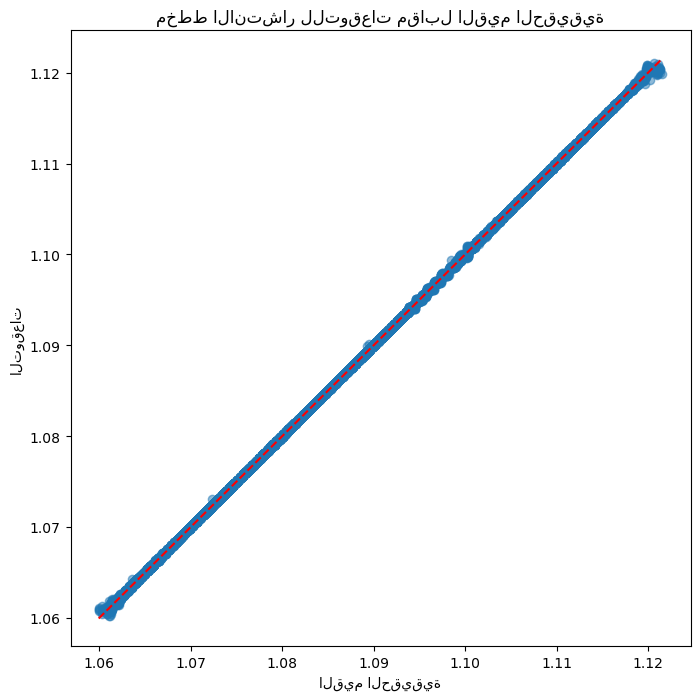

In [65]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('القيم الحقيقية')
plt.ylabel('التوقعات')
plt.title('مخطط الانتشار للتوقعات مقابل القيم الحقيقية')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط الهوية
plt.show()


In [6]:
comparison = pd.DataFrame({'القيم الحقيقية': y_test.values, 'التوقعات': y_pred})
print(comparison.head(20))  # عرض أول 20 صف


    القيم الحقيقية  التوقعات
0          1.10138  1.101366
1          1.11019  1.110301
2          1.08549  1.085490
3          1.09110  1.091105
4          1.11521  1.115190
5          1.11228  1.112298
6          1.08877  1.088777
7          1.07269  1.072652
8          1.10968  1.109768
9          1.09227  1.092247
10         1.08723  1.087207
11         1.09983  1.099925
12         1.08483  1.084832
13         1.11298  1.112993
14         1.08335  1.083325
15         1.06967  1.069684
16         1.06783  1.067946
17         1.07019  1.070173
18         1.08276  1.082759
19         1.11805  1.118042


In [8]:
comparison['الخطأ'] = comparison['التوقعات'] - comparison['القيم الحقيقية']
comparison['نسبة الخطأ'] = (comparison['الخطأ'] / comparison['القيم الحقيقية']) * 100

print(comparison.describe())

       القيم الحقيقية      التوقعات         الخطأ    نسبة الخطأ
count    50315.000000  50315.000000  5.031500e+04  50315.000000
mean         1.088708      1.088709  8.216450e-08      0.000007
std          0.015726      0.015726  6.959866e-05      0.006378
min          1.060210      1.060477 -1.458365e-03     -0.130086
25%          1.075290      1.075282 -2.505662e-05     -0.002299
50%          1.085770      1.085774 -1.358929e-07     -0.000013
75%          1.102825      1.102983  2.512687e-05      0.002306
max          1.121200      1.120718  1.524572e-03      0.143799


In [64]:
# حفظ النموذج المدرب
model.save_model(r'C:\Users\Access\Downloads\lightgbm_model.txt')
